In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['housing.csv']


In [37]:
data = pd.read_csv("../input/housing.csv")



In [38]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [40]:
data.loc[data["total_bedrooms"].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,186900.0,NEAR BAY
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,INLAND
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,INLAND
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,204100.0,INLAND
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,322300.0,NEAR BAY


In [41]:
data.groupby("ocean_proximity").describe()["median_house_value"]

,count,mean,std,min,25%,50%,75%,max
ocean_proximity,,,,,,,,
<1H OCEAN,9136.0,240084.285464,106124.292213,17500.0,164100.0,214850.0,289100.0,500001.0
INLAND,6551.0,124805.392001,70007.908494,14999.0,77500.0,108500.0,148950.0,500001.0
ISLAND,5.0,380440.000000,80559.561816,287500.0,300000.0,414700.0,450000.0,450000.0
NEAR BAY,2290.0,259212.311790,122818.537064,22500.0,162500.0,233800.0,345700.0,500001.0
NEAR OCEAN,2658.0,249433.977427,122477.145927,22500.0,150000.0,229450.0,322750.0,500001.0


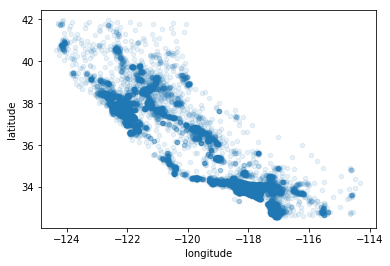

In [42]:
data.plot(kind = "scatter", x="longitude", y="latitude", alpha=0.1)

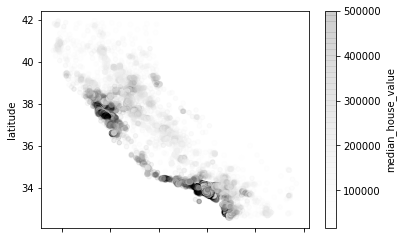

In [43]:
data.plot(kind = "scatter", x="longitude", y="latitude", alpha=0.1, c="median_house_value")

In [44]:
data["total_bedrooms"].isna().sum()

207

In [45]:
# data.loc[data["total_bedrooms"].isna(),"total_bedrooms"] = data.loc[~data["total_bedrooms"].isna(),"total_bedrooms"].median()

In [ ]:
# data.loc[~data["total_bedrooms"].isna(),"total_bedrooms"].median()




In [51]:
from sklearn.impute import SimpleImputer

data_numerical = data.drop("ocean_proximity",axis=1)
data_categorical = data["ocean_proximity"]

my_imputer = SimpleImputer(strategy="median")

my_imputer.fit(data_numerical)




SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [65]:
data_numerical_transformed = pd.DataFrame(my_imputer.transform(data_numerical),columns=data_numerical.columns)

In [70]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(data_numerical_transformed.drop("median_house_value",axis=1),data_numerical_transformed["median_house_value"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
lr_model.predict(data_numerical_transformed.drop("median_house_value",axis=1))

array([408844.60843986, 420911.66915291, 378857.45616476, ...,
        25967.4291983 ,  38404.57465341,  55254.21781936])